# Name: Rusikesh Patil
# Data Science and Business Analysis Internship
# Task 2: Prediction Using Unsupervised Learning ML

#### Importing required Libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the data and storing it into df DataFrame

In [2]:
df = pd.read_csv('Iris.csv')

#### Checking the first five rows of df

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### No null values and there are 150 entries and 6 feature columns

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


As we don't requrie the Id data for analysis and training so we eleminate it

In [6]:
df = df.drop('Id',axis=1)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Visualization

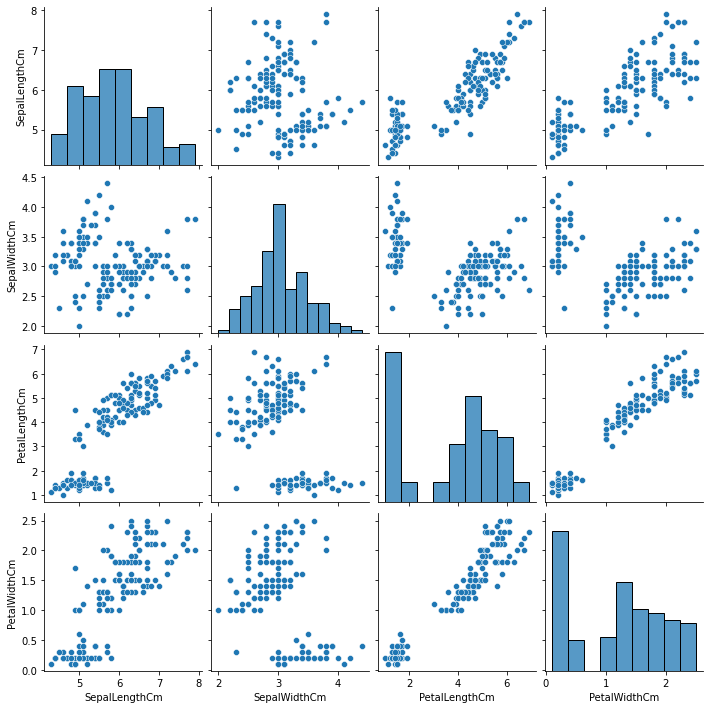

In [8]:
sns.pairplot(df.drop('Species',axis=1))

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

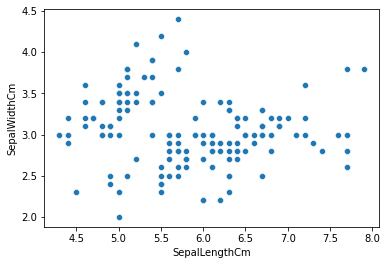

In [9]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

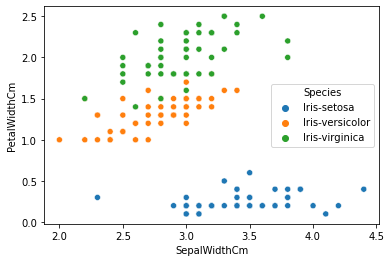

In [10]:
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',data=df)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

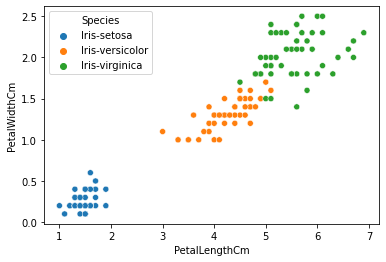

In [11]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

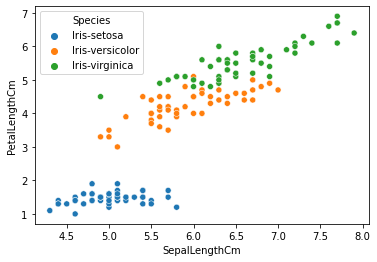

In [12]:
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=df)

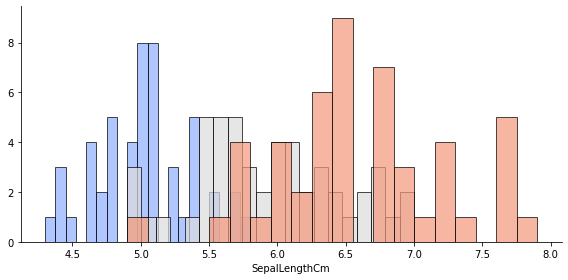

In [13]:
g = sns.FacetGrid(df,hue='Species',palette='coolwarm',height=4,aspect=2)
g = g.map(plt.hist,'SepalLengthCm',bins=20,alpha=0.7,edgecolor='black')

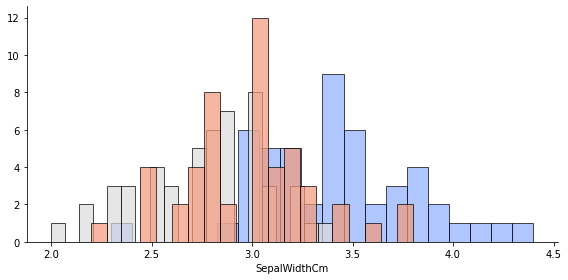

In [14]:
g = sns.FacetGrid(df,hue='Species',palette='coolwarm',height=4,aspect=2)
g = g.map(plt.hist,'SepalWidthCm',bins=20,alpha=0.7,edgecolor='black')

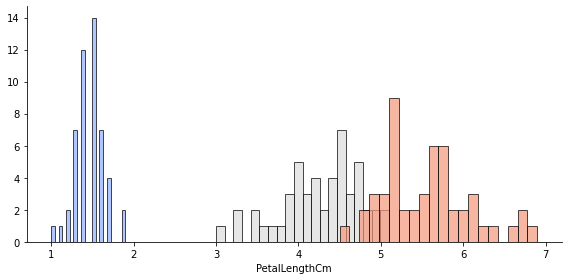

In [15]:
g = sns.FacetGrid(df,hue='Species',palette='coolwarm',height=4,aspect=2)
g = g.map(plt.hist,'PetalLengthCm',bins=20,alpha=0.7,edgecolor='black')

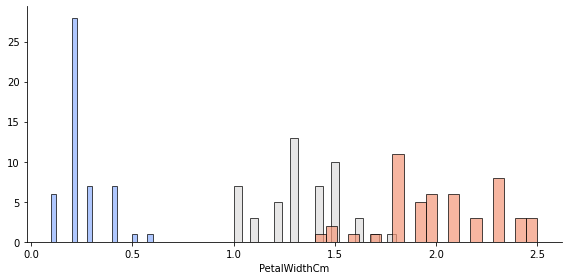

In [16]:
g = sns.FacetGrid(df,hue='Species',palette='coolwarm',height=4,aspect=2)
g = g.map(plt.hist,'PetalWidthCm',bins=20,alpha=0.7,edgecolor='black')

## Finding Optimum Number of Clusters with the help of Elbow Method and sum of squared distance

In [17]:
from sklearn.cluster import KMeans

In [18]:
cluster=[]
iris = df.iloc[:, [0, 1, 2, 3]].values

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(iris)
    cluster.append(kmeans.inertia_)


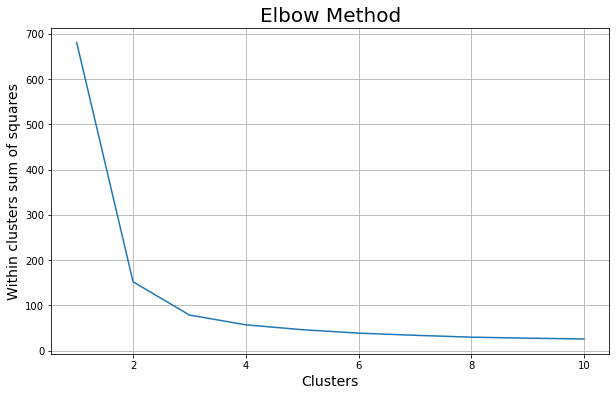

In [19]:
plt.figure(figsize=[10,6])
plt.plot(range(1,11),cluster)

plt.title("Elbow Method",fontsize=20)
plt.xlabel("Clusters",fontsize=14)
plt.ylabel("Within clusters sum of squares",fontsize=14)

plt.grid()
plt.show()

### Applying k-means clustering to data

In [20]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0) 
predictions = kmeans.fit_predict(iris)

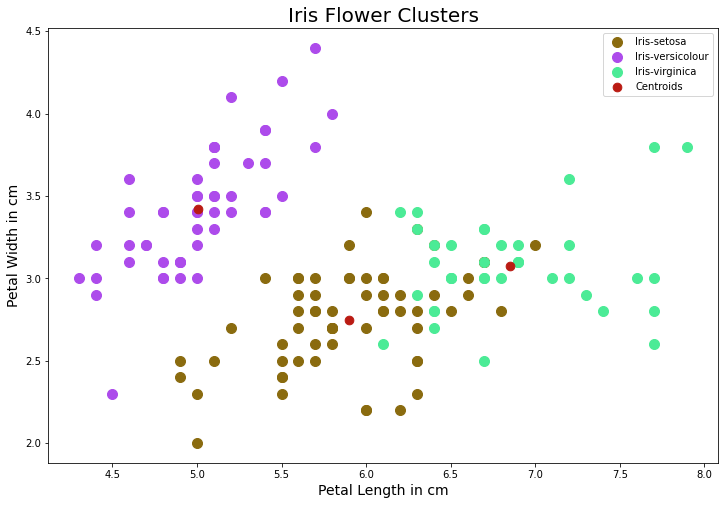

In [21]:
plt.figure(figsize=[12,8])

# Plotting the clusters

plt.scatter(iris[predictions == 0, 0], iris[predictions == 0, 1],s = 100, c = '#8a6b0f', label = 'Iris-setosa')
plt.scatter(iris[predictions == 1, 0], iris[predictions == 1, 1],s = 100, c = '#ad4beb', label = 'Iris-versicolour')
plt.scatter(iris[predictions == 2, 0], iris[predictions == 2, 1],s = 100, c = '#4beb96', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 300, c = '#ba1b13', label = 'Centroids',marker='.')


plt.title('Iris Flower Clusters',fontsize=20)
plt.ylabel('Petal Width in cm',fontsize=14)
plt.xlabel('Petal Length in cm',fontsize=14)


plt.legend()
plt.show()

#### Checking Accuracy

In [22]:
kmeans.labels_.shape

(150,)

In [23]:
def check(species):
    if species == 'Iris-setosa':
        return 1
    elif species == 'Iris-versicolor':
        return 0
    else:
        return 2

In [24]:
df['species_labeled'] = df['Species'].apply(check)

In [25]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_labeled
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
print(classification_report(df['species_labeled'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## Thank You!